# Calculating topographic factors from csv

Defining example probes from csv files

In [1]:
from cfdmod.use_cases.s1.profile import Profile
import pathlib

probes_path = pathlib.Path("./fixtures/tests/s1/csv")
pitot_path = pathlib.Path("./fixtures/tests/s1/csv/Pitot-000_U.csv")

s1_profile: list[Profile] = []
pitot = Profile.from_csv(pitot_path, "z", "U_0", "Pitot")

for file in [f for f in probes_path.iterdir() if "Pitot" not in f.name]:
    probe_path = pathlib.Path(file)
    probe = Profile.from_csv(probe_path, "z", "U_0", file.name)
    s1 = probe / pitot
    s1_profile.append(s1)

Plotting

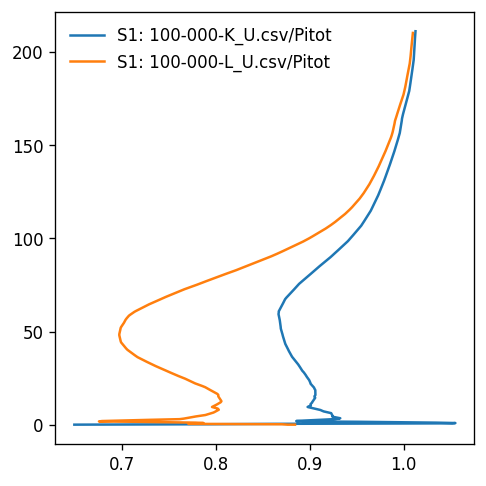

In [2]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

for result in s1_profile:
    ax.plot(result.values, result.pos, label=result.label)
set_style_tech()
ax.legend()
plt.show(fig)
plt.close(fig)